In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#RUN THIS CODE TO LOAD FIRST DATAFRAME
#(Pickle allows you to save any object (like dataframes) to ur file system)

df = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")

### Exploratory Data Analysis

In [4]:
#Check data frame head and tail

#Comment one line
#df.head()
df.tail()

SPLK                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-11  152.490005  153.300003  152.419998  152.729996  152.729996   
2024-01-12  152.729996  152.839996  152.600006  152.649994  152.649994   
2024-01-16  152.500000  152.770004  152.440002  152.630005  152.630005   
2024-01-17  152.449997  152.759995  152.449997  152.690002  152.690002   
2024-01-18  152.589996  152.964996  152.559998  152.789993  152.789993   

                            FTNT                                   ...  \
               Volume       Open       High        Low      Close  ...   
Date                                                               ...   
2024-01-11  2045000.0  62.000000  62.330002  60.959999  62.250000  ...   
2024-01-12  1513100.0  62.630001  63.040001  61.759998  62.439999  ...   
2024-01-16  1905400.0  61.090000  62.389999  61.009998  62.000000  ...   
2024-01-17  1540500.0  61.200001  61.619999  59.730000  60.619999  ...   
2024-01-18  1223770.0  61.000000  61.488998  60.290001  61.410000  ...   

                 CSGP                                          MU             \
                  Low      Close  Adj Close     Volume       Open       High   
Date                                                                           
2024-01-11  81.000000  82.110001  82.110001  1749100.0  82.800003  83.449997   
2024-01-12  82.430000  83.400002  83.400002  1261900.0  82.750000  83.050003   
2024-01-16  81.300003  81.760002  81.760002  1655300.0  82.540001  85.220001   
2024-01-17  80.169998  81.690002  81.690002  1546900.0  83.690002  83.970001   
2024-01-18  81.300003  81.830002  81.830002  1673084.0  85.220001  85.820000   

                                                         
                  Low      Close  Adj Close      Volume  
Date                                                     
2024-01-11  81.820000  83.389999  83.389999  10579300.0  
2024-01-12  81.709999  82.389999  82.389999  10185700.0  
2024-01-16  82.330002  84.610001  84.610001  13713500.0  
2024-01-17  82.629997  83.279999  83.279999  10245400.0  
2024-01-18  84.050003  84.820000  84.820000  15043276.0  

[5 rows x 606 columns]

In [5]:
#Check size of the information
df.shape

(15618, 606)

In [6]:
#Comment different lines to see different things about the df

#datframe info
#df.info

#dataframe index
#df.index

#dataframe columns
#check companies
df.columns.get_level_values(0).unique()

#check features about companies
#df.columns.get_level_values(1).unique()

Index(['SPLK', 'FTNT', 'TMUS', 'CDW', 'NFLX', 'DXCM', 'KHC', 'ILMN', 'IDXX',
       'TEAM',
       ...
       'REGN', 'ADBE', 'SBUX', 'BIIB', 'MAR', 'BKNG', 'KLAC', 'CMCSA', 'CSGP',
       'MU'],
      dtype='object', length=101)

<Axes: xlabel='None-None', ylabel='Date'>

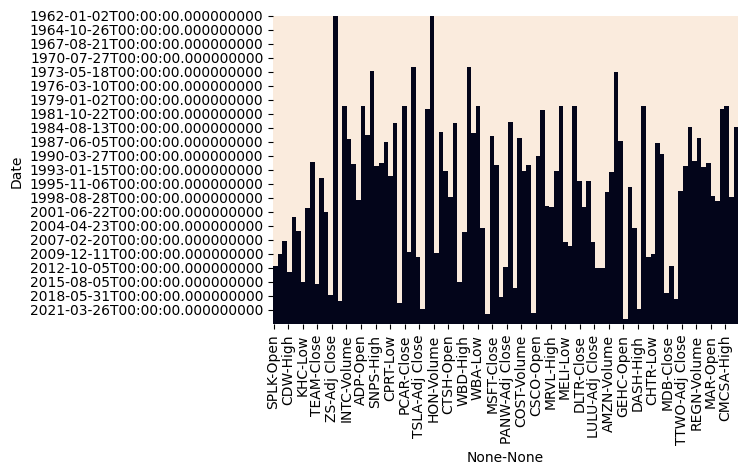

In [7]:
#Check for Missing values

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),cbar=False)

#We can see that basically there is only complete data from 2021 to 2022 but if we can fix/infer close feature for airbnb we can have data from 2015
#Although I think 2 years of data is enough for first versions of the project - Juan HenaoBarrios

In [8]:
#Filter data by a single ticker and drop missing values for that ticker
ticker = 'AAPL'
single_ticker = df.loc[:, [ticker]]

#if we want to filter by date
#single_ticker.loc[single_ticker.index >= dt.datetime.strptime("2020-01-01", "%Y-%m-%d")]

single_ticker.dropna(inplace=True)
single_ticker.head()

AAPL                                                     
                Open      High       Low     Close Adj Close       Volume
Date                                                                     
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.099319  469033600.0
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.094137  175884800.0
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.087228  105728000.0
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089387   86441600.0
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091978   73449600.0

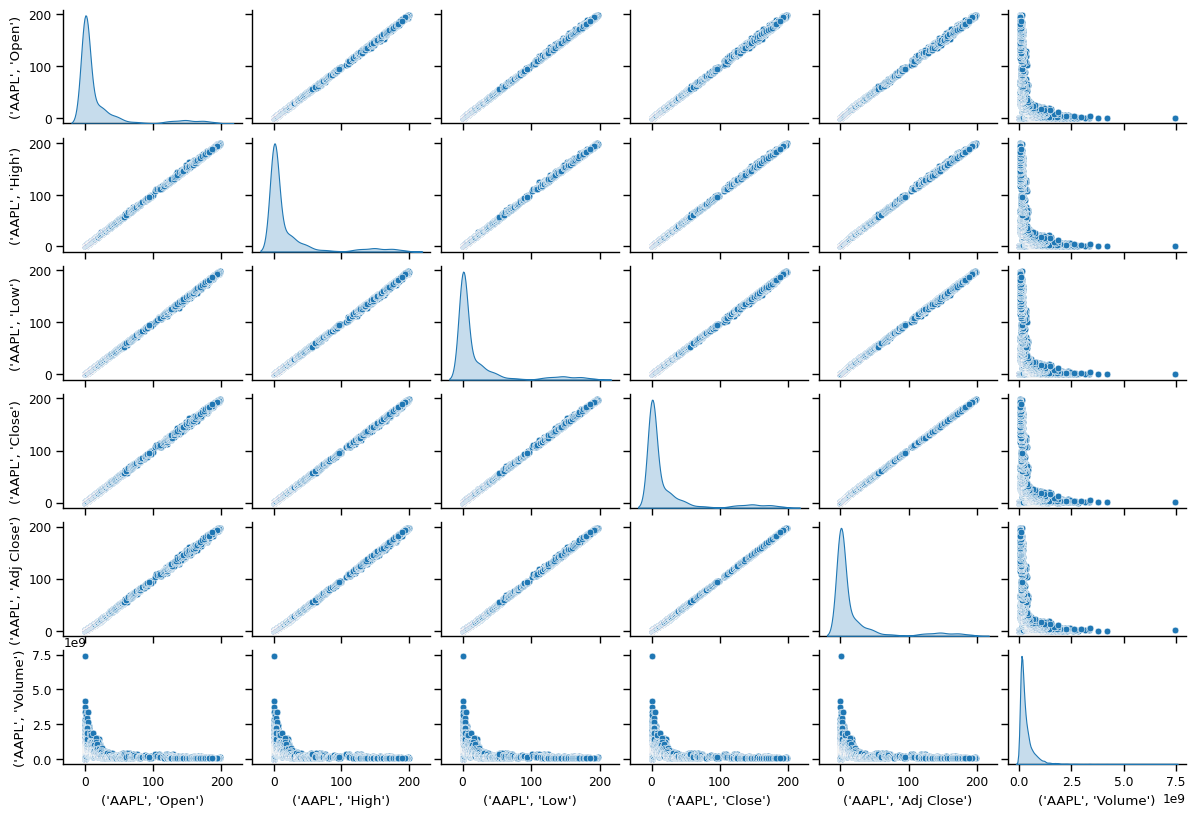

In [9]:
sns.set_context("paper")
g=sns.pairplot(data=single_ticker, diag_kind='kde')
g.fig.set_size_inches(12,8)

In [10]:
#drop ticker level for columns
single_ticker.columns = single_ticker.columns.droplevel(0)
single_ticker.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600.0


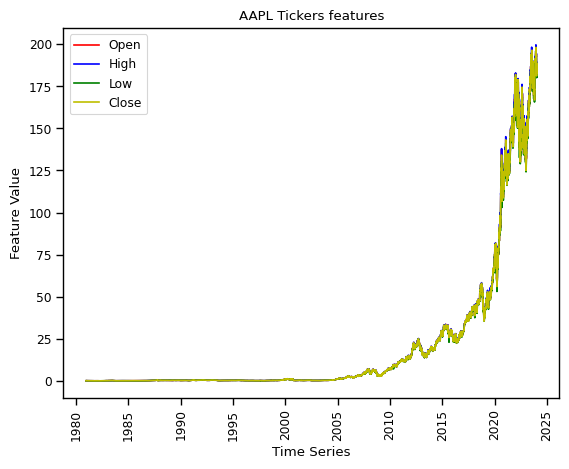

In [11]:
#Now let's plot values for Apple in this timeframe 
plt.plot(single_ticker.index, single_ticker['Open'], 'r', label='Open')
plt.plot(single_ticker.index, single_ticker['High'], 'b', label='High')
plt.plot(single_ticker.index, single_ticker['Low'] , 'g', label='Low')
plt.plot(single_ticker.index, single_ticker['Close'] , 'y', label='Close')
#plt.plot(single_ticker.index, single_ticker['Volume'], label='Volume')
plt.title('AAPL Tickers features')
plt.xlabel('Time Series')
plt.xticks(rotation=90)
plt.ylabel('Feature Value')
plt.legend()

plt.show()


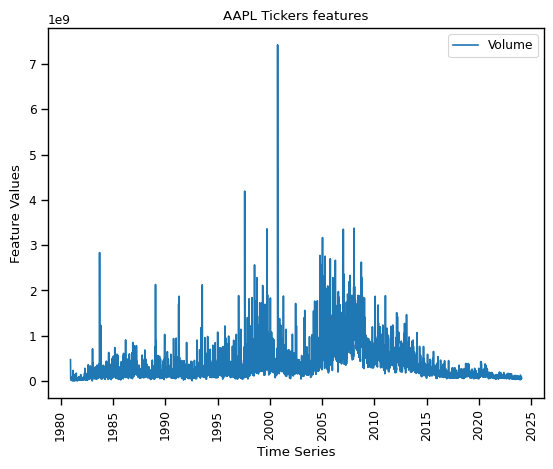

In [12]:
#Now let's plot values for Apple in this timeframe 
plt.plot(single_ticker.index, single_ticker['Volume'], label='Volume')
plt.title(ticker+' Tickers features')
plt.xlabel('Time Series')
plt.xticks(rotation=90)
plt.ylabel('Feature Values')
plt.legend()

plt.show()

In [13]:
#Finally let's check the range of the data
for feature in list(single_ticker.columns):
    print("Max value in ",feature,":",round(max(single_ticker[feature]), 2) )
    print("Min value in ",feature,":",round(min(single_ticker[feature]), 2) )

Max value in  Open : 198.02
Min value in  Open : 0.05
Max value in  High : 199.62
Min value in  High : 0.05
Max value in  Low : 197.0
Min value in  Low : 0.05
Max value in  Close : 198.11
Min value in  Close : 0.05
Max value in  Adj Close : 198.11
Min value in  Adj Close : 0.04
Max value in  Volume : 7421640800.0
Min value in  Volume : 0.0
